In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

import warnings

# Set the style to a dark background
plt.style.use('ggplot')
warnings.filterwarnings("ignore")
sns.set_palette("pastel")
#%matplotlib inline
from IPython.display import display
from ipywidgets import interact, IntSlider

In [ ]:
!mkdir "images" 

In [34]:
path="images"

In [2]:


fert = pd.read_csv('data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('data/gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel('data/gapminder_population.xlsx', index_col=0)
                     

In [3]:
cont = pd.read_csv('data/continents.csv', sep=";")
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [4]:
print(life.shape)

(260, 217)


In [5]:
print(fert.shape)

(260, 216)


In [6]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [7]:
life.columns

Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       ...
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype='int64', length=217)

In [8]:
fert.columns = fert.columns.astype(int)

In [9]:
fert.index

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda',
       ...
       'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
       'Åland', 'Åland'],
      dtype='object', name='Total fertility rate', length=260)

In [10]:
fert.index.name ="country"

In [11]:
fert = fert.reset_index()
fert

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
257,Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')


In [13]:
fert

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [14]:
life.index.name ="country"
life

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69


In [15]:
life = life.reset_index()

In [16]:
life = life.melt(id_vars='country', var_name='year', value_name='life_exp')

In [17]:
life

,country,year,life_exp
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


In [18]:
pop.columns

Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910,
       1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype='int64')

In [19]:
pop.index.name

'Total population'

In [20]:
pop.index.name ="country"
pop

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pop = pop.reset_index()

In [22]:
pop = pop.melt(id_vars='country', var_name='year', value_name='population')

In [23]:
pop

,country,year,population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
22270,Northern Marianas,2015,NaN
22271,South Georgia and the South Sandwich Islands,2015,NaN
22272,US Minor Outlying Islands,2015,NaN
22273,Virgin Islands,2015,NaN


In [24]:
df_1 = fert.merge(pop)

In [25]:
df = df_1.merge(life)

In [26]:
df = df.merge(cont)

In [27]:
df

,country,year,fertility_rate,population,life_exp,continent
0,Afghanistan,1800,7.00,3280000.0,28.21,Asia
1,Afghanistan,1810,7.00,3280000.0,28.11,Asia
2,Afghanistan,1820,7.00,3323519.0,28.01,Asia
3,Afghanistan,1830,7.00,3448982.0,27.90,Asia
4,Afghanistan,1840,7.00,3625022.0,27.80,Asia
...,...,...,...,...,...,...
14170,Zimbabwe,2011,3.64,14255592.0,51.60,Africa
14171,Zimbabwe,2012,3.56,14565482.0,54.20,Africa
14172,Zimbabwe,2013,3.49,14898092.0,55.70,Africa
14173,Zimbabwe,2014,3.41,15245855.0,57.00,Africa


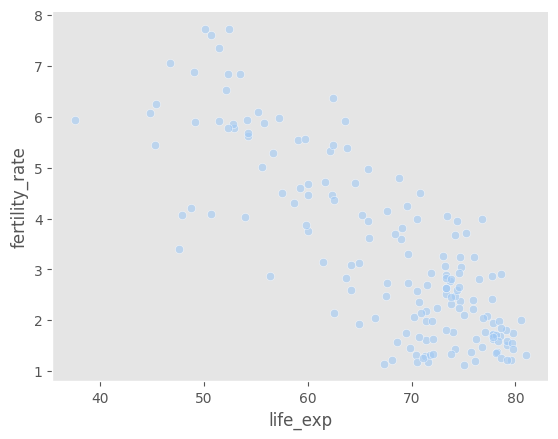

In [28]:
df_subset = df.loc[df['year'] == 2000]
sns.scatterplot(x='life_exp', y='fertility_rate',
            data=df_subset, alpha=0.6);

sns.despine()
plt.grid(False) 



In [29]:
# Calculate the middle right point of the scatter plot
x_middle = df_subset['life_exp'].max()  
y_middle = df_subset['fertility_rate'].mean()


Text(83.7, 3.2990963855421693, 'Middle Right')

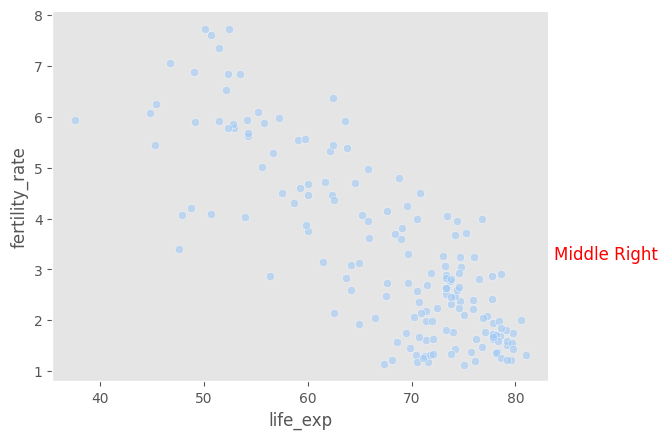

In [30]:
df_subset = df.loc[df['year'] == 2000]
sns.scatterplot(x='life_exp', y='fertility_rate',
            data=df_subset, alpha=0.6);

sns.despine()
plt.grid(False)


plt.text(x_middle, y_middle, 'Middle Right', color='red', ha='left', va='center', fontsize=12)

In [31]:
df

,country,year,fertility_rate,population,life_exp,continent
0,Afghanistan,1800,7.00,3280000.0,28.21,Asia
1,Afghanistan,1810,7.00,3280000.0,28.11,Asia
2,Afghanistan,1820,7.00,3323519.0,28.01,Asia
3,Afghanistan,1830,7.00,3448982.0,27.90,Asia
4,Afghanistan,1840,7.00,3625022.0,27.80,Asia
...,...,...,...,...,...,...
14170,Zimbabwe,2011,3.64,14255592.0,51.60,Africa
14171,Zimbabwe,2012,3.56,14565482.0,54.20,Africa
14172,Zimbabwe,2013,3.49,14898092.0,55.70,Africa
14173,Zimbabwe,2014,3.41,15245855.0,57.00,Africa


In [32]:
df["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia and Oceania'], dtype=object)

In [35]:


for year in range(1960, 2015):
    plt.figure(figsize=(10, 8)) 
    df_subset = df.loc[df['year'] == year]
    df_subset.loc['population'] = pd.to_numeric(df_subset['population'], errors='coerce')
    sns.scatterplot(x='life_exp', y='fertility_rate',
            data=df_subset, alpha=0.7, size=df_subset['population']/100_000,
                    sizes=(20, 5000), hue="continent",legend=False)
    specific_countries = ['Ukraine', 'China', 'Morocco']
    for country in specific_countries:
        country_data = df_subset[df_subset['country'] == country]
        if not country_data.empty:
            plt.text(country_data['life_exp'].values[0], country_data['fertility_rate'].values[0], country,
                 fontsize=10, ha='right', va='center')

    sns.despine()
    plt.xlabel('life expectancy [years]')
    plt.ylabel('fertility [children per women]')
    plt.text(62, 5, year, fontsize=60, style='oblique', alpha=0.19)
    
    plt.title(f'Gapminder: {year}')
    
    
    plt.grid(False)
    plt.savefig(f'{path}/frame_{year}.png')
    plt.close()
    

In [36]:
images = []

for year in range(1960, 2015):
    filename = f'{path}/frame_{year}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('animated_plot.gif', images, duration=200)

In [37]:
def plot_gapminder(year):
    plt.figure(figsize=(10, 8)) 
    df_subset = df.loc[df['year'] == year]
    df_subset['population'] = pd.to_numeric(df_subset['population'], errors='coerce')
    
    plot=sns.scatterplot(x='life_exp', y='fertility_rate',
                    data=df_subset, alpha=0.7, size=df_subset['population']/100_000,
                    sizes=(20, 5000), hue="continent", legend=False)
    
    specific_countries = ['Ukraine', 'China', 'Morocco']
    for country in specific_countries:
        country_data = df_subset[df_subset['country'] == country]
        if not country_data.empty:
            plt.text(country_data['life_exp'].values[0], country_data['fertility_rate'].values[0], country,
                 fontsize=10, ha='right', va='center')

    sns.despine()
    plt.xlabel('life expectancy [years]')
    plt.ylabel('fertility [children per women]')
    plt.text(62, 5, year, fontsize=60, style='oblique', alpha=0.19)
    
    plt.title(f'Gapminder: {year}')
    
    plt.grid(False)
    plt.show()
    return plot


# Create an interactive slider
year_slider = IntSlider(description='Year', min=1960, max=2014, step=1, value=1960)

# Interact the slider with the plot function
interact(plot_gapminder, year=year_slider)


    


interactive(children=(IntSlider(value=1960, description='Year', max=2014, min=1960), Output()), _dom_classes=(…

<function __main__.plot_gapminder(year)>

In [ ]:
plot_gapminder(1980)